In [2]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\Able\Desktop\SMSSpam filter dataset\SMSSpamcollection.txt", sep = '\t')
dataset.columns = ['label', 'body_text']
dataset.head()

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
dataset['body_text_length'] = dataset['body_text'].apply(lambda x: len(x) - x.count(" "))
dataset.head()

,label,body_text,body_text_length
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,U dun say so early hor... U c already then say...,39
3,ham,"Nah I don't think he goes to usf, he lives aro...",49
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116


In [5]:
import string

def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")), 3)*100

dataset['punctuation_percentage'] = dataset['body_text'].apply(lambda x: count_punctuation(x))
dataset.head()

,label,body_text,body_text_length,punctuation_percentage
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116,6.9


In [6]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

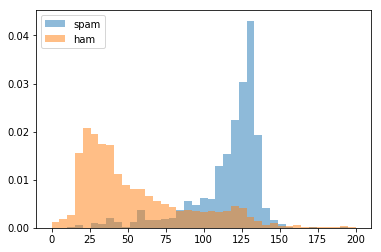

In [8]:
bins = np.linspace(0, 200, 40)
pyplot.hist(dataset[dataset['label'] == 'spam']['body_text_length'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(dataset[dataset['label'] == 'ham']['body_text_length'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

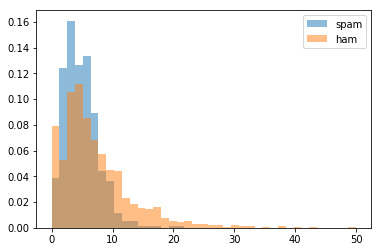

In [9]:
bins = np.linspace(0, 50, 40)
pyplot.hist(dataset[dataset['label'] == 'spam']['punctuation_percentage'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(dataset[dataset['label'] == 'ham']['punctuation_percentage'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc = 'upper right')
pyplot.show()

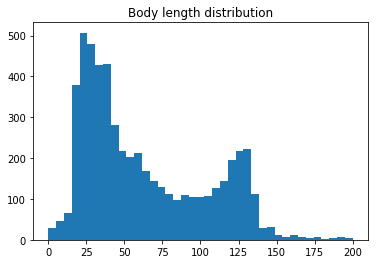

In [10]:
bins = np.linspace(0, 200, 40)
pyplot.hist(dataset['body_text_length'], bins)
pyplot.title("Body length distribution")
pyplot.show()

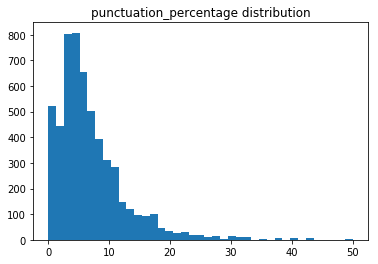

In [11]:
bins = np.linspace(0, 50, 40)
pyplot.hist(dataset['punctuation_percentage'], bins)
pyplot.title("punctuation_percentage distribution")
pyplot.show()

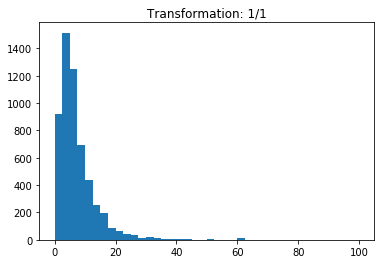

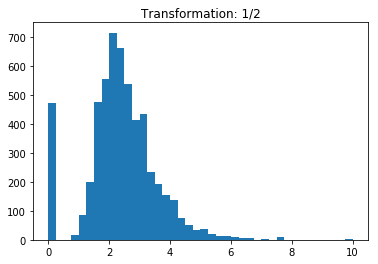

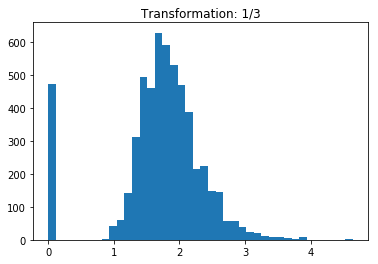

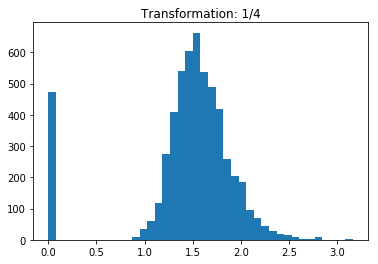

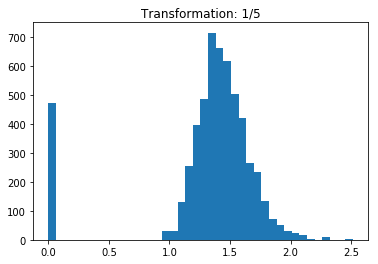

In [13]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((dataset['punctuation_percentage'])**(1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()